Characterization of complex networks: degree and transitivity

In [1]:
from numpy  import *
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

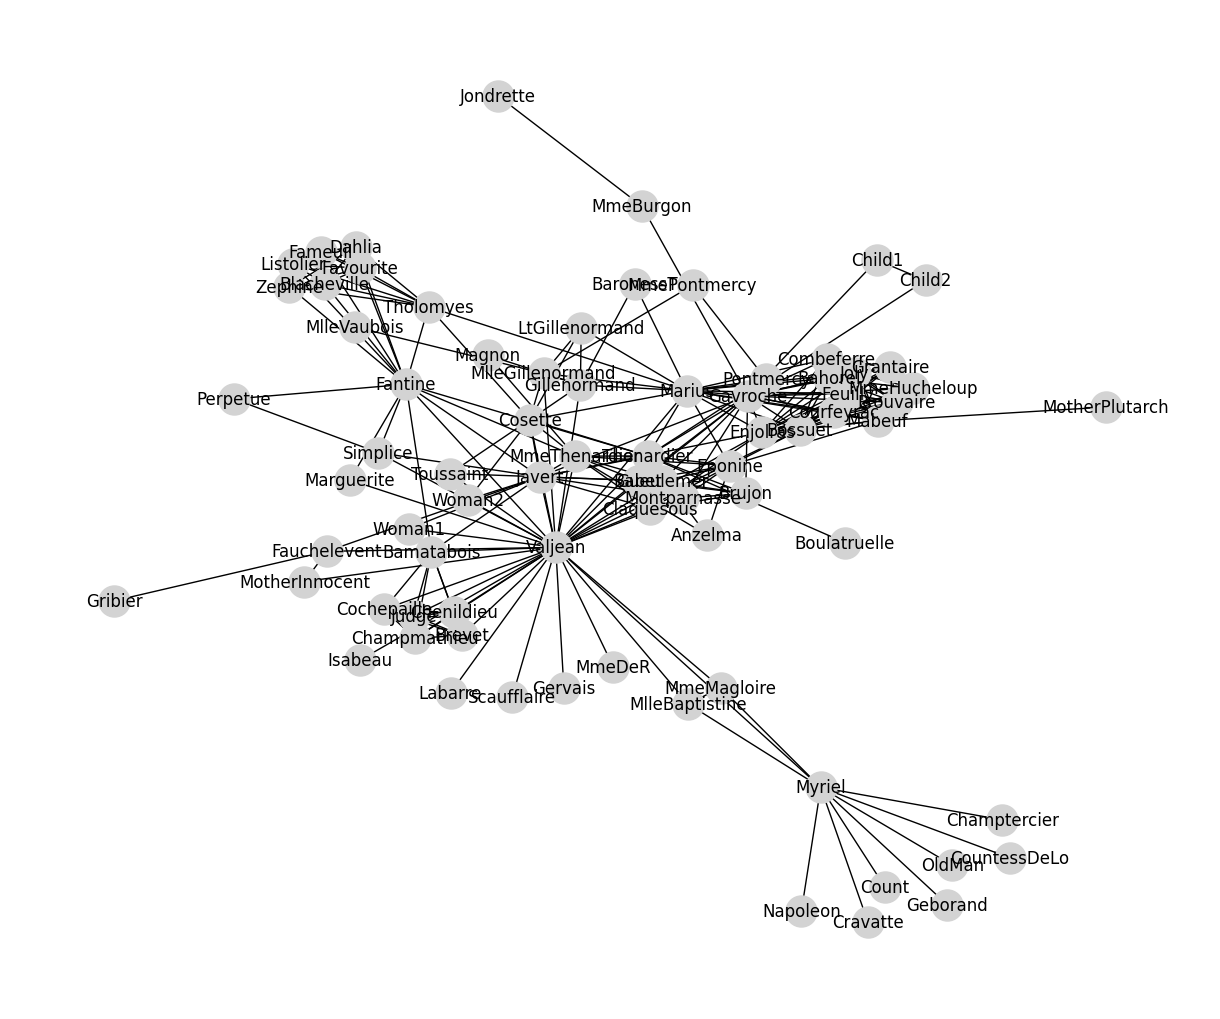

In [2]:
#G= nx.read_edgelist("data/lesmis.txt", nodetype=int, data=(('weight',float),))
G= nx.read_gml("data/lesmis.gml") # Read the network
# If the data file has only two columns, use this:
#G= G=nx.read_edgelist("data/powergrid.txt", nodetype=int)

plt.figure(figsize=(12,10))
pos = nx.spring_layout(G)
nx.draw(G, pos, node_color="lightgray", node_size=500, with_labels=True)

In [3]:
G = G.to_undirected()
G.remove_edges_from(nx.selfloop_edges(G))

In [4]:
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G = G.subgraph(Gcc[0])

In [5]:
G = nx.convert_node_labels_to_integers(G, first_label=0)

In [6]:
N = len(G)
M = G.number_of_edges()
print('Number of nodes:', N)
print('Number of edges:', M)

Number of nodes: 77
Number of edges: 254


Connectivity Measures

In [7]:
vk = dict(G.degree()).values()
vk = np.array(list(vk))
print('Degree', vk)

Degree [10  1  3  3  1  1  1  1  1  1  1 36  2  1  1  1  9  7  7  7  7  7  7 15
 11 16 11 17  4  8  2  4  1  2  6  6  6  6  6  3  1 11  3  3  2  1  1  2
 22  7  2  7  2  1  4 19  2 11 15 11  9 11 13 12 13 12 10  1 10 10 10  9
  3  2  2  7  7]


In [8]:
md = mean(vk)
print('Grau médio: ', md)

Grau médio:  6.597402597402597


In [9]:
def momment(G,m):
    M = 0
    N = len(G)
    for i in G.nodes:
        M = M + G.degree(i)**m
    M = M/N
    return M

print('Primeiro momento de k:', momment(G,1))
print('Segundo momento de k:', momment(G,2))
print('Terceiro momento de k:', momment(G,3))
print('Variância de k:', np.var(vk))
print('Mediana de k:', np.median(vk))

Primeiro momento de k: 6.597402597402597
Segundo momento de k: 79.53246753246754
Terceiro momento de k: 1408.025974025974
Variância de k: 36.006746500253
Mediana de k: 6.0


In [10]:
def degree_distribution(G):
    vk = dict(G.degree())
    vk = list(vk.values())  # we get only the degree values
    vk = np.array(vk)
    maxk = np.max(vk)
    mink = np.min(vk)
    kvalues= np.arange(0,maxk+1) # possible values of k
    Pk = np.zeros(maxk+1) # P(k)
    for k in vk:
        Pk[k] = Pk[k] + 1
    Pk = Pk/sum(Pk) # the sum of the elements of P(k) must to be equal to one
    return kvalues,Pk

In [11]:
ks, Pk = degree_distribution(G)

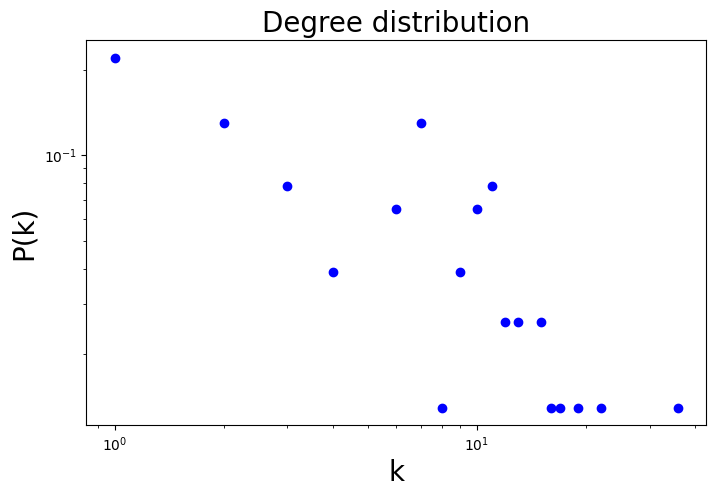

In [12]:
plt.figure(figsize=(8,5))
fig = plt.subplot(1,1,1)
fig.set_xscale('log')
fig.set_yscale('log')
plt.plot(ks,Pk,'bo')
plt.xlabel("k", fontsize=20)
plt.ylabel("P(k)", fontsize=20)
plt.title("Degree distribution", fontsize=20)
#plt.grid(True)
plt.savefig('degree_dist.eps') #save the figure into a file
plt.show(True)

In [13]:
def momment_of_degree_distribution(G,m):
    k,Pk = degree_distribution(G)
    M = sum((k**m)*Pk)
    return M

k1 = momment_of_degree_distribution(G,1)
print("Grau médio = ", mean(vk))
print("Primeiro momento da distribuição do grau = ", k1)

k2 = momment_of_degree_distribution(G,2)
print("Segundo momento da distribuição do grau = ", k2)

variance = momment_of_degree_distribution(G,2) - momment_of_degree_distribution(G,1)**2
print("Variância do grau = ", variance)

Grau médio =  6.597402597402597
Primeiro momento da distribuição do grau =  6.5974025974025965
Segundo momento da distribuição do grau =  79.53246753246754
Variância do grau =  36.00674650025301


In [14]:
import math
def shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H

H = shannon_entropy(G)
print("Shannon Entropy = ", "%3.4f"%H)

Shannon Entropy =  3.5957


In [15]:
def normalized_shannon_entropy(G):
    k,Pk = degree_distribution(G)
    H = 0
    for p in Pk:
        if(p > 0):
            H = H - p*math.log(p, 2)
    return H/math.log(len(G),2)

In [16]:
H = normalized_shannon_entropy(G)
print("Normalized Shannon Entropy = ", "%3.4f"%H)

Normalized Shannon Entropy =  0.5738


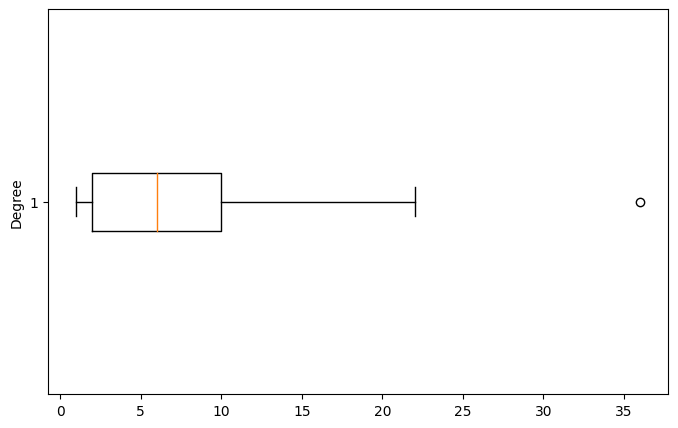

In [17]:
fig, ax = plt.subplots(figsize=(8,5))
ax.boxplot(vk, vert = 0)
ax.set_ylabel('Degree')
plt.show(True)

Clustering coefficient and transitivity

In [18]:
CC = (nx.transitivity(G)) 
print("Transitivity = ","%3.4f"%CC)

Transitivity =  0.4989


In [19]:
avc = nx.average_clustering(G)
print("Average clustering:", "%3.4f"%avc)

Average clustering: 0.5731


In [20]:
vcc = []
for i in G.nodes():
    vcc.append(nx.clustering(G, i))
vcc= np.array(vcc)
print('Clustering of all nodes:', vcc)

Clustering of all nodes: [0.06666667 0.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.12063492
 1.         0.         0.         0.         0.61111111 1.
 1.         1.         1.         1.         1.         0.31428571
 0.49090909 0.40833333 0.38181818 0.32352941 0.33333333 0.64285714
 1.         0.66666667 0.         1.         1.         1.
 1.         1.         1.         0.33333333 0.         0.45454545
 1.         1.         1.         0.         0.         0.
 0.35497835 0.47619048 0.         0.42857143 0.         0.
 1.         0.33333333 1.         0.69090909 0.60952381 0.92727273
 1.         0.92727273 0.75641026 0.86363636 0.76923077 0.86363636
 0.93333333 0.         0.8        0.8        0.71111111 0.83333333
 1.         1.         1.         0.9047619  1.        ]


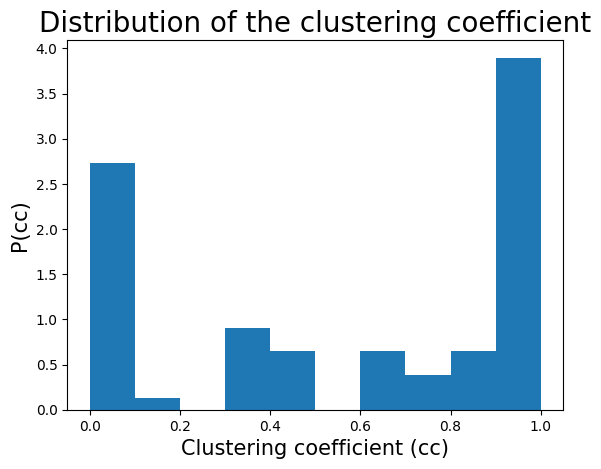

In [21]:
plt.figure()
plt.hist(vcc, bins  = 10, density=True)
plt.title("Distribution of the clustering coefficient", fontsize=20)
plt.ylabel("P(cc)", fontsize=15)
plt.xlabel("Clustering coefficient (cc)", fontsize=15)
#plt.grid(True)
plt.savefig('clustering.eps') #save the figure into a file
plt.show()

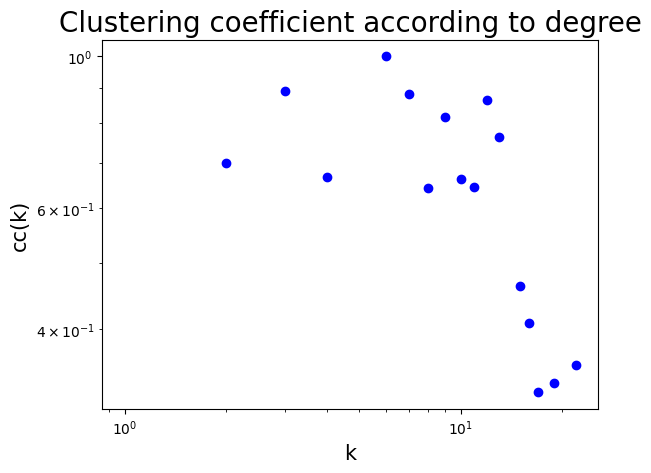

In [22]:
#Average clustering for each degree k
ck = list()
ks = list()
for k in np.arange(np.min(vk), np.max(vk)):
    aux = vk == k
    if(len(vcc[aux]) > 0):
        cm = mean(vcc[aux]) #average clustering among all the nodes with degree k
        ck.append(cm)
        ks.append(k)
plt.loglog(ks,ck,'bo')
plt.title("Clustering coefficient according to degree", fontsize=20)
plt.ylabel("cc(k)", fontsize=15)
plt.xlabel("k", fontsize=15)
#plt.grid(True)
plt.savefig('cck.eps')
plt.show(True)